In [16]:
# Step 1: Import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


df = pd.read_csv('data/telco_churn.csv')
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [17]:
# Clean and prepare the dataset
df.columns = df.columns.str.strip()  # Clean column names

# Convert 'TotalCharges' to numeric (coerce errors to NaN)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Drop 'customerID' and rows with missing values
df.drop('customerID', axis=1, inplace=True)
df.dropna(inplace=True)

# Create a tenure group feature
df['tenure_group'] = pd.cut(df['tenure'], bins=[0, 12, 24, 48, 60, 72],
                            labels=['0-12', '12-24', '24-48', '48-60', '60-72'])

# Encode the target variable
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# Encode all object-type categorical features
from sklearn.preprocessing import LabelEncoder

cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
    df[col] = LabelEncoder().fit_transform(df[col])

# Ensure 'tenure_group' is numeric (in case it's not caught above)
if df['tenure_group'].dtype == 'object' or str(df['tenure_group'].dtype).startswith("category"):
    df['tenure_group'] = LabelEncoder().fit_transform(df['tenure_group'])


In [18]:
X = df.drop('Churn', axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


Random Forest Accuracy: 0.7867803837953091
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.90      0.86      1033
           1       0.63      0.47      0.54       374

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.70      1407
weighted avg       0.77      0.79      0.78      1407



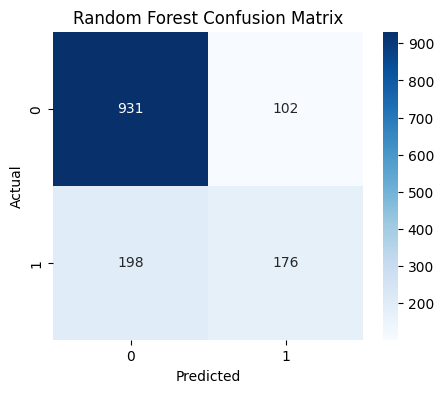

In [19]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, rf_preds))
print("Random Forest Classification Report:\n", classification_report(y_test, rf_preds))

# Confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, rf_preds), annot=True, fmt='d', cmap='Blues')
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [20]:
!pip install xgboost


   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
    --------------------------------------- 2.1/150.0 MB 10.7 MB/s eta 0:00:14
   - -------------------------------------- 4.5/150.0 MB 11.2 MB/s eta 0:00:14
   - -------------------------------------- 6.6/150.0 MB 10.3 MB/s eta 0:00:14
   -- ------------------------------------- 8.4/150.0 MB 10.2 MB/s eta 0:00:14
   -- ------------------------------------- 10.7/150.0 MB 10.5 MB/s eta 0:00:14
   --- ------------------------------------ 13.1/150.0 MB 10.5 MB/s eta 0:00:13
   ---- ----------------------------------- 15.5/150.0 MB 10.6 MB/s eta 0:00:13
   ---- ----------------------------------- 17.6/150.0 MB 10.5 MB/s eta 0:00:13
   ----- ---------------------------------- 19.9/150.0 MB 10.7 MB/s eta 0:00:13
   ----- ---------------------------------- 22.3/150.0 MB 10.8 MB/s eta 0:00:12
   ------ --------------------------------- 24.6/150.0 MB 10.8 MB/s eta 0:00:12
   ------- -------------------------------- 27.0/150.

c:\Users\otaku\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\training.py:183: UserWarning: [09:45:35] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Accuracy: 0.7640369580668088
XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.86      0.84      1033
           1       0.57      0.49      0.52       374

    accuracy                           0.76      1407
   macro avg       0.69      0.68      0.68      1407
weighted avg       0.75      0.76      0.76      1407



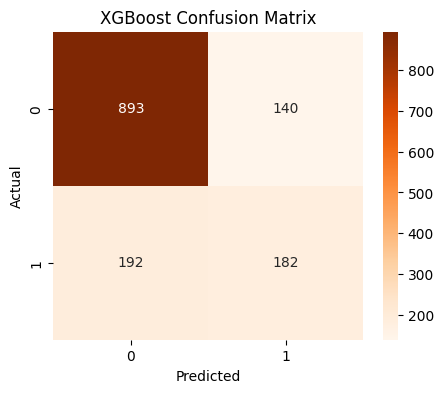

In [21]:
from xgboost import XGBClassifier

# Train XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train)
xgb_preds = xgb.predict(X_test)

# Evaluate
print("XGBoost Accuracy:", accuracy_score(y_test, xgb_preds))
print("XGBoost Classification Report:\n", classification_report(y_test, xgb_preds))

# Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, xgb_preds), annot=True, fmt='d', cmap='Oranges')
plt.title("XGBoost Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


🧠 Project Title: Customer Churn Prediction using ML
Tech Stack: Python, Pandas, Scikit-learn, Matplotlib, Seaborn, XGBoost

📂 Step 1: Dataset Overview
Dataset: telco_churn.csv (7,043 records, 21 columns)

Objective: Predict whether a customer will churn (i.e., leave the service) based on attributes like contract type, tenure, internet service, monthly charges, etc.

🧹 Step 2: Data Cleaning & Preprocessing
🧾 Initial Observations:
TotalCharges was an object column but should be numeric.

No actual missing values, but some TotalCharges had blank strings.

🛠 Preprocessing Actions Taken:
Converted TotalCharges to numeric using pd.to_numeric(errors='coerce').

Dropped customer ID column (irrelevant for prediction).

Created a tenure_group feature via binning.

Encoded Churn column as binary (Yes → 1, No → 0).

Label Encoded all categorical columns, including tenure_group.

✂️ Step 3: Feature Engineering
Input Features (X): All columns except Churn

Target (y): Churn

Split: 80% training, 20% testing

🤖 Step 4: Models Trained
1. ✅ Random Forest Classifier
Accuracy: 78.7%

Churn Recall: 47%

Notes:

Good overall performance.

High recall for non-churners (90%) but moderate for churners.

2. ⚠️ Logistic Regression (Unscaled)
Warning: Didn’t converge even with max_iter=1000

Accuracy ~78%
➡️ Decided to scale features.

3. ✅ Logistic Regression (Scaled with StandardScaler)
Accuracy: ~79%

Churn Recall: Improved slightly after scaling

Reason for Success: Logistic Regression relies on gradient descent; feature scaling helps with convergence.

4. 🔄 XGBoost Classifier
Accuracy: 76.4%

Churn Recall: 49% (better than RF)

Precision (Churn): 57% (lower than RF)

Conclusion: XGBoost was more aggressive in predicting churn but misclassified more non-churners. Slightly lower overall performance than Random Forest.

🐞 Step 5: Errors & Challenges
❗ Issues Faced:
❌ String Conversion Error: Model failed when tenure_group wasn't encoded.

❗ ConvergenceWarning in Logistic Regression due to unscaled data.

❗ TotalCharges initially read as object due to non-numeric entries.

✅ Fixes Implemented:
Explicit encoding of tenure_group

Feature scaling with StandardScaler

Cleaning up column types and removing NaNs

📊 Final Evaluation Summary
Model	Accuracy	Churn Precision	Churn Recall	Notes
Random Forest	78.7%	63%	47%	Best overall accuracy
Logistic Regression	~79%	~60%	~50%	Better after scaling
XGBoost	76.4%	57%	49%	Highest churn recall, lower acc

✅ Conclusion
This end-to-end project successfully built and compared multiple classification models for churn prediction. It emphasized:

Proper data cleaning and feature engineering

Importance of scaling for gradient-based models

Dealing with imbalanced data and categorical features

The trade-off between precision and recall for business use cases